# Multiple Linear Regression using Python
In this notebook we will solve a Multiple Linear Regression problem using Python programming language. In order to do this we will use some commonly used libraries for solving machine learning tasks, these includes Pandas, Numpy, Matplotlib and Scikit-learn.

## Task 1:

Suppose we want to determine the price per unit area of a house in a dataset of historical purchases made in an area in which we have multiple features such as __*transaction_number, transaction_date, house_age, distance_to_nearest_bus_station, number_of_convenience_stores, latitude, and longitude.*__


The objective of this task is to train a ML regression model that can accurately predict the price per unit area of a given house.

![alt text](img/real_estate.jpg "Real Estate")

### Step 1: Importing Libraries for our task

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### 2. Reading the data from the provided file
Since the data is in a CSV format, we are going to read this file using the pandas's read_csv method

In [2]:
df = pd.read_csv('dataset/03-real_estate_dataset.csv')

### 3. Exploring the data 
Let us explore the data 

In [3]:
df.shape

(414, 8)

In [4]:
df.head()

,number,transaction_date,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.describe()

,number,transaction_date,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


After exploring our data, we can use our intuition, to drop some of the features that might have no contribution to our model

In [6]:
df = df.drop('number', axis=1)
df = df.drop('transaction_date', axis=1)
df.head()

,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


### 4. Splitting the data into training and test sets

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:,df.shape[1]-1]

In [ ]:
x = df['unit_area_price'].drop

In [8]:
X.head()

,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### 5. Building the model to fit the training data

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### 6. Using the model to make predictions for the test data set 

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = -1194.2145132626354
w = [-2.65600030e-01 -4.74964456e-03  1.13434674e+00  2.28565503e+02
 -3.67741638e+01]


### 7. Evaluating our model performance

In [13]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 66.75
Coefficient of determination: 0.58


We can use our model to make different kinds of predictions as follows

In [14]:
data = {
'house_age':[32.0],
'distance_to_nearest_bus_station': [84.87882],
'number_of_convenience_stores':[10],
'latitude':[24.98298],
'longitude':[121.54024],
}

data = pd.DataFrame(data)
val = model.predict(data)
print(val)

[48.93331686]


## Task 2
The aim of this task is to build a model which predicts sales based on the money spent on different platforms such as TV, radio, and newspaper for marketing by using Simple Linear Regression and Multiple Linear Regression. The dataset contains the following features ***TV, Radio, Newspaper*** and the target column is ***Sales*** 

Hint: _For Simple Linear Regression, select the feature with the highest correlation with the target column._

Compare the Mean Squared error and Coefficient of determination for both models

## Task 3:

To develop the best medical insurance products, the insurer needs access to historical data to approximate the medical costs of each user. With this data, a medical insurer can develop more accurate pricing models, plan a particular insurance outcome. For all these cases, the objective is to accurately predict insurance costs.

![alt text](img/health_insurance.jpg "Health Insurance")


#### Dataset
You are provided with a dataset in the **dataset/04-insurance_charges.csv** file that contains medical insurance records. The individual medical costs billed by health insurance are the target variable charges, and the rest of columns contain personal information such as age, gender, family status, and whether the patient smokes among other features.
The following is the description of the features contained in the dataset: 
- **age:** age of primary beneficiary
- **sex:** insurance contractor gender, female, male
- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges:** Individual medical costs billed by health insurance

#### Use Case
The objective is to train a ML regression model that can accurately predict the insurance costs for a given individual



## TASK 2 - SOLUTION
### CREATING A MODEL WHICH PREDICTS SALES

#### IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn  as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("dataset/04-advertising_dataset.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [14]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [20]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rsme = rmse = np.sqrt(mse) 
r2_score = r2_score(y_test, y_pred)

##### Validating our Model after training 

In [26]:
print(f"The MSE : {mse} ")
print(f"The RSME : {rsme}")
print(f" The Coeficient of determinant {r2_score}")

The MSE : 2.4040674447118895 
The RSME : 1.5505055448826648
 The Coeficient of determinant 0.9115647723992757


In [27]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

##### Testing the functionability of the Model created

In [29]:
data = {
'TV':[45.5],
'Radio':[39.3],
'Newspaper':[45.1],  
}

data = pd.DataFrame(data)
val = model.predict(data)
print(f"The Predicted Sale is :  {val}")

The Predicted Sale is :  [11.34147191]


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### FINITUNIG THE MODEL TO CHECH FOR THE BEST MODEL PERFOMANCE
- WE NORMALIZE THE DATA USING MINIMAX SCALER AND TRANSFORM THE DATASETS

In [31]:
## Finituning the model by normalizing the data

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [36]:
# Test the model on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, y_pred)

In [37]:
print(f" The MSE {mse}")
print(f" The RMSE {rmse}")
print(f" The Coeficient of determinant {r2_score}")

 The MSE 2.404067444711892
 The RMSE 1.5505055448826657
 The Coeficient of determinant 0.9115647723992756


In [39]:
data = {
'TV':[0.26208996],
'Radio':[0.94354839],
'Newspaper':[0.33996024],  
}

data = pd.DataFrame(data)
val = model.predict(data)
print(f"The Predicted Sale is :  {val}")

The Predicted Sale is :  [13.82990786]


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### INSIGHTS
- The normalized model didn't perform well but the un normalized model perform well this shows us that the datasets we have can perform well even if we didn't normalize the data

## TASK 3 - SOLUTION
### CREATING A MODEL WHICH PREDICT MEDICAL COSTS

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn  as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("dataset/05-insurance_charges.csv")

In [4]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
## checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
## checking for duplicated values
g = df.duplicated().sum()
print(g)

1


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

PERFORMING DATA VISUALIZATION

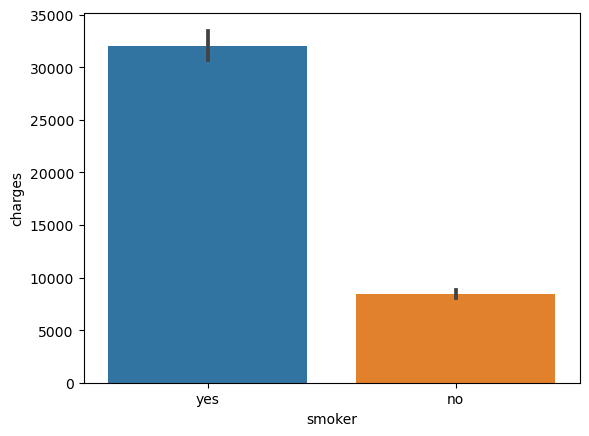

In [15]:
# Bar Chart for Smoker vs. Charges
sns.barplot(x='smoker', y='charges', data=df)
plt.show()

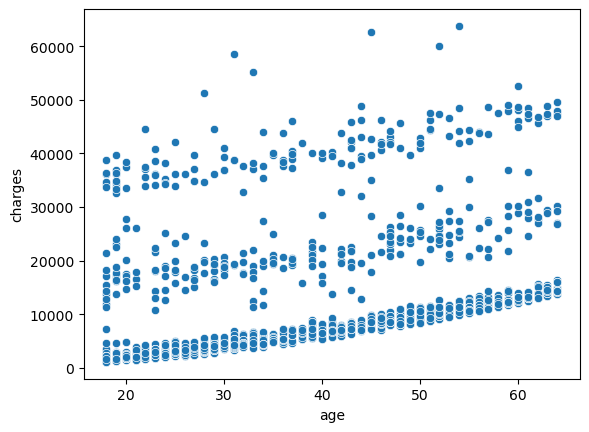

In [23]:
# Scatter Plot for Age vs. Charges
sns.scatterplot(x='age', y='charges', data=df)
plt.show()

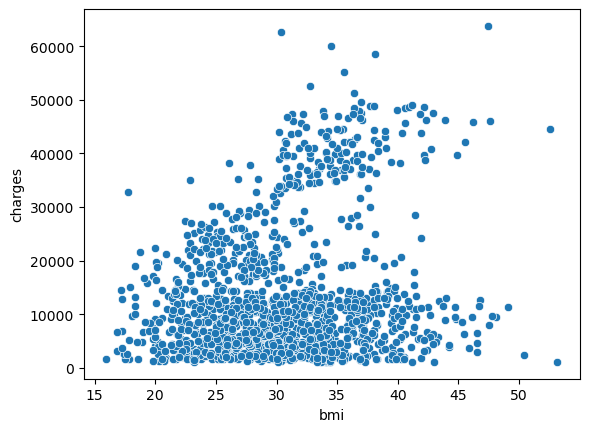

In [24]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.show()

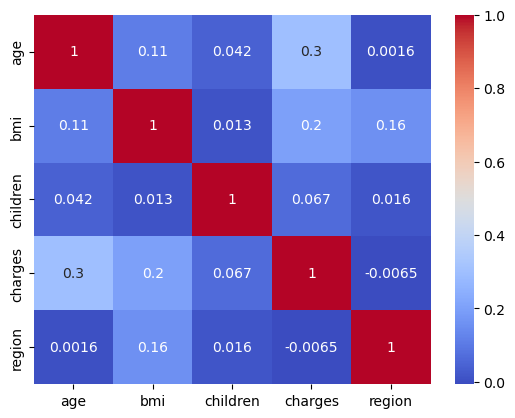

In [33]:
# Correlation Heatmap
correlation_matrix = df[['age', 'bmi', 'children', 'charges','region']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


SHOWING CORRELATION OF DATA TO THE TARGET COLUMN

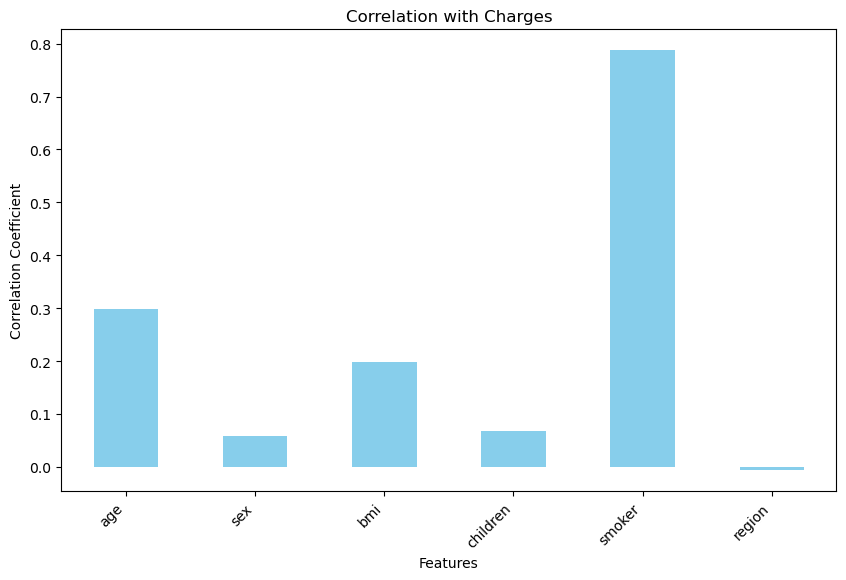

In [28]:
correlation_with_charges = df.corr()['charges'].drop('charges')  # Extract correlations with 'charges'

# Plotting the correlation bar graph
plt.figure(figsize=(10, 6))
correlation_with_charges.plot(kind='bar', color='skyblue')
plt.title("Correlation with Charges")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.show()

PERFORMING LABEL ENCODING FOR THE CATEGORICAL FEATURES

In [36]:
# feature scalling by using minmaxscaler method
scaler = MinMaxScaler(feature_range=(0, 1))


df['age'] = scaler.fit_transform(df['age'].values.reshape(-1,1))
df['bmi'] = scaler.fit_transform(df['bmi'].values.reshape(-1,1))
df['charges'] = scaler.fit_transform(df['charges'].values.reshape(-1,1))

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0,1,3,0.251611
1,0.000000,1,0.479150,1,0,2,0.009636
2,0.217391,1,0.458434,3,0,2,0.053115
3,0.326087,1,0.181464,0,0,1,0.333010
4,0.304348,1,0.347592,0,0,1,0.043816


In [40]:
# SHOWING CORRELATION OF DATA TO THE TARGET COLUMN
features_corr = pd.DataFrame(abs(df.corr()['charges']).sort_values(ascending = False))

features_corr

,charges
charges,1.000000
smoker,0.787234
age,0.298308
bmi,0.198401
children,0.067389
sex,0.058044
region,0.006547


DROPING FEATURE WITH LEAST CORRETION WITH THE TARGET

In [56]:
df.drop('region', axis=1,inplace=True)

In [57]:
X = df.drop('charges', axis=1)  # Features or Independent varible
y = df['charges']  # Target variable or Dependent variable

In [58]:
X.head()

,age,sex,bmi,children,smoker
0,0.021739,0,0.321227,0,1
1,0.000000,1,0.479150,1,0
2,0.217391,1,0.458434,3,0
3,0.326087,1,0.181464,0,0
4,0.304348,1,0.347592,0,0


In [59]:
y.head()

0    0.251611
1    0.009636
2    0.053115
3    0.333010
4    0.043816
Name: charges, dtype: float64

#### SPLITING DATASETS & TRAINING THE MODEL

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

VALDATING THE MODEL

In [68]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
rsme = rmse = np.sqrt(mse) 
r2_score = r2_score(y_test, y_pred)

In [64]:
print(f" The MSE {mse}")
print(f" The RMSE {rmse}")
print(f" The Coeficient of determinant {r2_score}")

 The MSE 0.009147354269134733
 The RMSE 0.09564180189192764
 The Coeficient of determinant 0.8068466322629108


TESTING THE PERFORMANCE OF THE MODEL

In [66]:
data = {
'age':[0.021739],
'sex':[0],
'bmi':[0.321227], 
'children':[0],
'smoker':[1],    
}

data = pd.DataFrame(data)
val = model.predict(data)
print(f"The Predicted Charge :  {val}")

The Predicted Charge :  [0.382569]
